In [24]:
import numpy as np
import pandas as pd

seeds_data = pd.read_csv("seeds.txt") 
seeds_data["grain_variety"].replace({"Kama wheat": "0", "Rosa wheat": "1", "Canadian wheat": "2"}, inplace=True)
seeds = seeds_data
seeds

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2


In [12]:
import seaborn as sns

sns.set(style="white")

# Compute the correlation matrix
corr = seeds.corr()
corr

#compactness does not have strong correlation with all other variables except asymmetry coefficient
#groove_length is highly correlated with seed length but not seed width, however, compactness is the opposite.

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
length,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
width,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
asymmetry_coefficient,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
groove_length,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


In [26]:
corr.abs().mean(axis=0).sort_values(ascending = False)
#perimeter and area have the greatest overall correlation with other variables

area                     0.802379
perimeter                0.792709
width                    0.792117
length                   0.750729
groove_length            0.667760
compactness              0.546482
asymmetry_coefficient    0.317009
dtype: float64

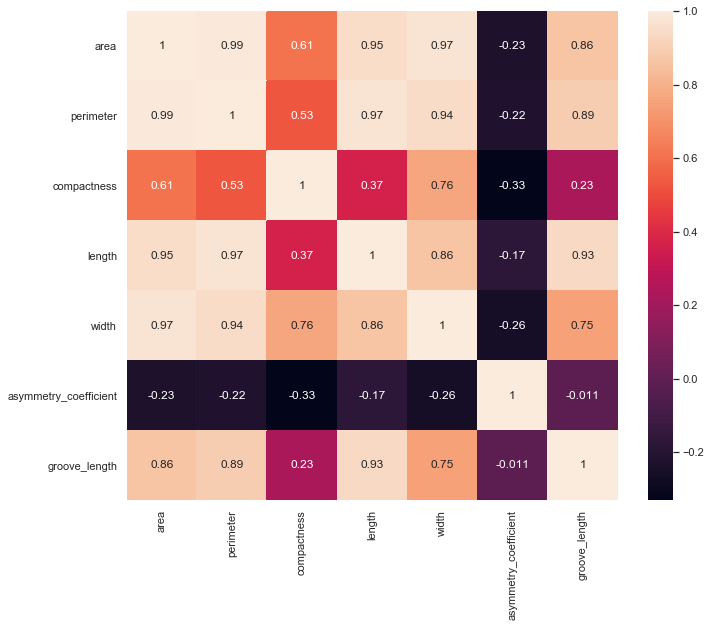

In [18]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, annot=True)
plt.show()



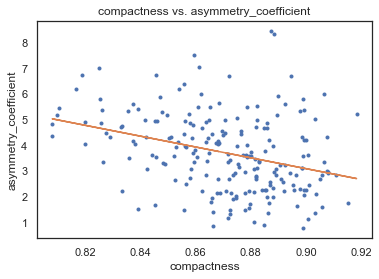

In [16]:
# data visidualization
from numpy.polynomial.polynomial import polyfit

b, m = polyfit(seeds['compactness'], seeds['asymmetry_coefficient'], 1)

plt.plot(seeds['compactness'], seeds['asymmetry_coefficient'], '.')
plt.plot(seeds['compactness'], b + m * seeds['compactness'], '-')
plt.title('compactness vs. asymmetry_coefficient')
plt.xlabel('compactness')
plt.ylabel('asymmetry_coefficient')
plt.show()

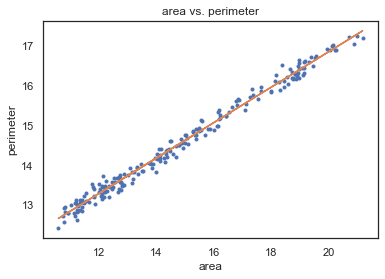

In [327]:
b, m = polyfit(seeds['area'], seeds['perimeter'], 1)

plt.plot(seeds['area'], seeds['perimeter'], '.')
plt.plot(seeds['area'], b + m * seeds['area'], '-')
plt.title('area vs. perimeter')
plt.xlabel('area')
plt.ylabel('perimeter')
plt.show()

# highly correlated, points are very closed to the regression line

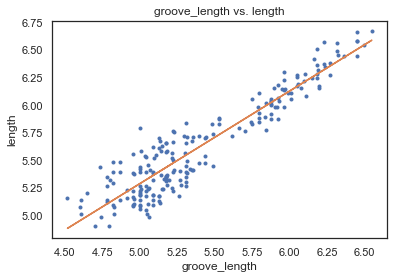

In [328]:
b, m = polyfit(seeds['groove_length'], seeds['length'], 1)

plt.plot(seeds['groove_length'], seeds['length'], '.')
plt.plot(seeds['groove_length'], b + m * seeds['groove_length'], '-')
plt.title('groove_length vs. length')
plt.xlabel('groove_length')
plt.ylabel('length')
plt.show()

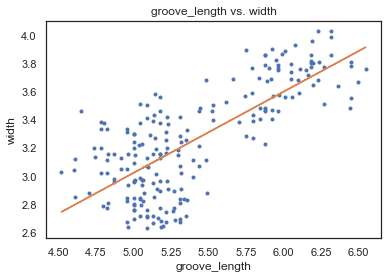

In [329]:
b, m = polyfit(seeds['groove_length'], seeds['width'], 1)

plt.plot(seeds['groove_length'], seeds['width'], '.')
plt.plot(seeds['groove_length'], b + m * seeds['groove_length'], '-')
plt.title('groove_length vs. width')
plt.xlabel('groove_length')
plt.ylabel('width')
plt.show()

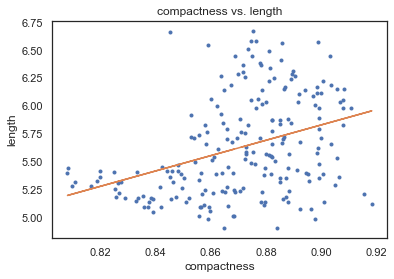

In [330]:
b, m = polyfit(seeds['compactness'], seeds['length'], 1)

plt.plot(seeds['compactness'], seeds['length'], '.')
plt.plot(seeds['compactness'], b + m * seeds['compactness'], '-')
plt.title('compactness vs. length')
plt.xlabel('compactness')
plt.ylabel('length')
plt.show()

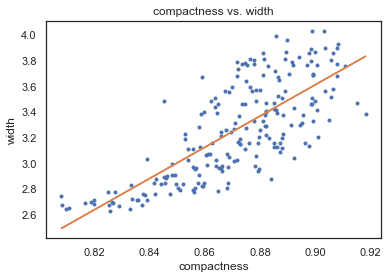

In [331]:
b, m = polyfit(seeds['compactness'], seeds['width'], 1)

plt.plot(seeds['compactness'], seeds['width'], '.')
plt.plot(seeds['compactness'], b + m * seeds['compactness'], '-')
plt.title('compactness vs. width')
plt.xlabel('compactness')
plt.ylabel('width')
plt.show()

In [22]:
X = seeds.iloc[:, [0,1,2, 3,4,5,6]].to_numpy().astype('float') #divide the data for classification purpose
Y = seeds.iloc[:, 7].to_numpy().astype('int')

# random sampling
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = \
train_test_split(X, Y, test_size=0.3, random_state=10)

In [23]:
# Use LOOCV to classify species (1-dim)

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
import sklearn.linear_model as skl_lm

p_order = np.arange(1,11)
r_state = np.arange(0,10)

# LeaveOneOut CV
regr = skl_lm.LinearRegression()
loo = LeaveOneOut()
loo.get_n_splits(seeds)
scores = list()

for i in p_order:
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(seeds[['area']].values.reshape(-1,1))
    score = cross_val_score(regr, X_poly, Y, cv=loo, scoring='neg_mean_squared_error').mean()
    scores.append(score)

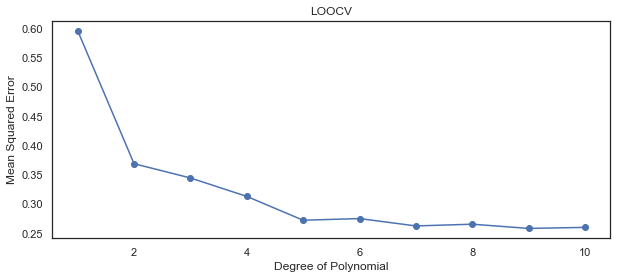

In [334]:
fig, (ax1) = plt.subplots(1, figsize=(10,4))

# Note: cross_val_score() method return negative values for the scores.
# https://github.com/scikit-learn/scikit-learn/issues/2439

ax1.plot(p_order, np.array(scores)*-1, '-o')
ax1.set_title('LOOCV')

for ax in fig.axes:
    ax.set_ylabel('Mean Squared Error')
    ax.set_xlabel('Degree of Polynomial')
    
# when degree of polynomial equals 5, it reaches the elbow point, which means the model will be most efficient at poly degree equals to 5.

In [35]:
import statsmodels.api as sm
poly = PolynomialFeatures(5)
X_poly = poly.fit_transform(seeds[['area']].values.reshape(-1,1))
model = sm.OLS(Y,X_poly).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     63.40
Date:                Sat, 02 May 2020   Prob (F-statistic):           1.10e-39
Time:                        22:01:49   Log-Likelihood:                -156.95
No. Observations:                 210   AIC:                             325.9
Df Residuals:                     204   BIC:                             346.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1331.8634    218.975     -6.082      0.0

In [37]:
# Use Grid Search and Cross Validation to classify species (K-dim)

from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=100)
for train_index, test_index in split.split(X,Y):
    X_train_strat, Y_train_strat = X[train_index], Y[train_index]
    X_test_strat, Y_test_strat = X[test_index], Y[test_index]

In [45]:
import sklearn.linear_model as skl_lm
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import clone
from sklearn.model_selection import GridSearchCV

param_grid=[{'n_estimators':[3, 10, 30], 'max_features':[1,2,3,4,5,6,7],'bootstrap':[True,False]}]
tree=RandomForestClassifier()
grid_search=GridSearchCV(tree, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_strat, Y_train_strat)

# Use Random Forest as our classifier

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [46]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
result=pd.DataFrame(grid_search.cv_results_['params'])
result['accuracy']=grid_search.cv_results_['mean_test_score']
result.sort_values('accuracy', ascending=False)

,bootstrap,max_features,n_estimators,accuracy
36,False,6,3,0.952381
31,False,4,10,0.952381
20,True,7,30,0.952381
19,True,7,10,0.952381
13,True,5,10,0.952381
39,False,7,3,0.945714
35,False,5,30,0.945714
34,False,5,10,0.945714
38,False,6,30,0.945714
37,False,6,10,0.945714


In [48]:
from sklearn.metrics import accuracy_score

final_model=grid_search.best_estimator_
test_final_pred=final_model.predict(X_test_strat)
accuracy_score(Y_test_strat, test_final_pred)

0.9047619047619048

In [49]:
from sklearn.metrics import confusion_matrix
test_final_pred=final_model.predict(X_test_strat)
conf=confusion_matrix(Y_test_strat, test_final_pred)
conf

array([[20,  1,  0],
       [ 2, 19,  0],
       [ 3,  0, 18]], dtype=int64)

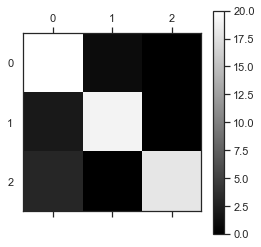

In [50]:
import matplotlib.pyplot as plt
plt.matshow(conf, cmap=plt.cm.gray)
plt.colorbar();

In [342]:
def decision_region(X, Y, model, prob=None):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                         np.arange(x2_min, x2_max, 0.1))

    Z = model.predict(np.c_[x1.ravel(), x2.ravel()])
    
    if prob is not None:
        prob_max=model.predict_proba(np.c_[x1.ravel(), x2.ravel()]).max(1)
        Z[prob_max<prob]=-1
    
    Z = Z.reshape(x1.shape)

    plt.contourf(x1, x2, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=20, edgecolor='k')
    plt.show()

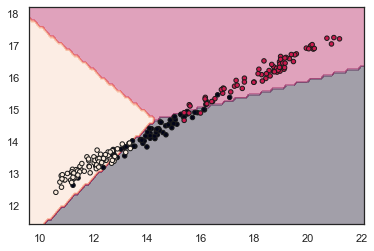

In [343]:
# Multiclass Regression (One vs Rest)
seeds_area_perimeter=seeds.iloc[:, [0,1]].to_numpy().astype('float') # area + perimeter from corrogram
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

logit1=OneVsRestClassifier(LogisticRegression(penalty = 'none'))
logit1.fit(seeds_area_perimeter,Y)
decision_region(seeds_area_perimeter,Y,logit1)

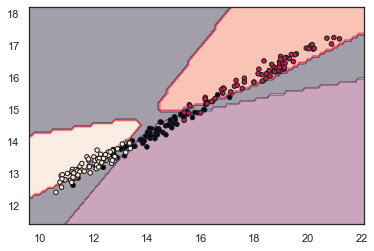

In [344]:
decision_region(seeds_area_perimeter,Y,logit1,prob=0.7) #only point in red, green, and yellow regions are confidently predicted

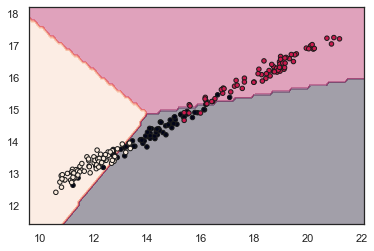

In [345]:
logit2=LogisticRegression(penalty = 'none', multi_class='multinomial')
logit2.fit(seeds_area_perimeter,Y)
decision_region(seeds_area_perimeter,Y,logit2)

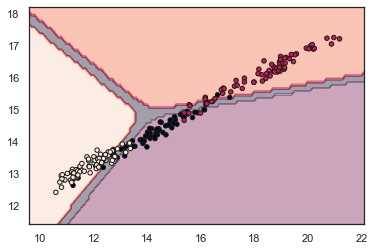

In [346]:
decision_region(seeds_area_perimeter,Y,logit2,prob=0.7) #only point in blue, green, and yellow regions are confidently predicted

#Multinomial regression does a much better job on confidently predicting

In [348]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

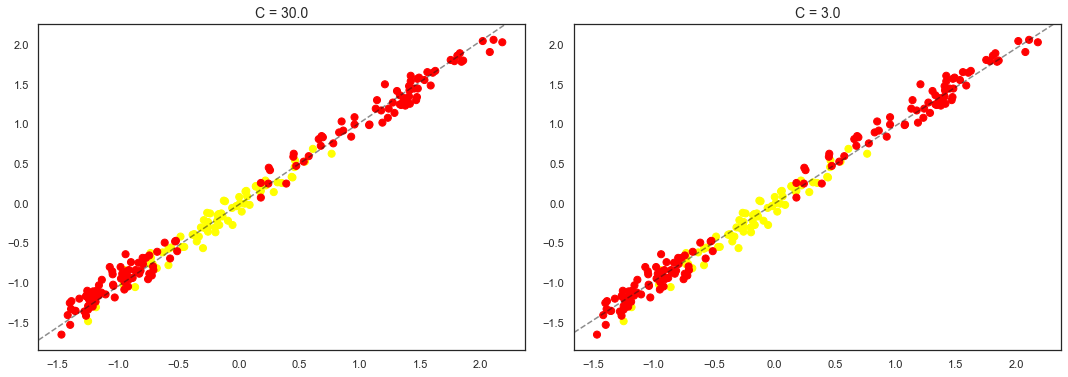

In [351]:
y_kama=((seeds.iloc[:, 7].to_numpy().astype('int')) == 0).astype('int') # 1 if kama else 0

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [30, 3]):
    model = SVC(kernel='linear', C=C).fit(X_scale, y_kama)
    axi.scatter(X_scale[:, 0], X_scale[:, 1], c=y_kama, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)
    
# Data points are severely overlapped, not ideal to use svm